<h1 align=center> Reestructurando Datos </h1>

### Reescalado de datos

Es probable que por convención se quiera trabajar los valores númericos con valores en el rango 0-1, o 0-100.

In [8]:
url1     <- "https://raw.githubusercontent.com/joanby/r-course/master/data/tema1/missing-data.csv"
data1R   <- read.csv(url1, row.names=NULL)
data1R$Income[data1R$Income == 0]          <- NA
data1R$Phone_type[data1R$Phone_type == ""] <- NA
data1R$Car_type[data1R$Car_type == ""]     <- NA
ingresos <- data1R

In [9]:
library(scales)
ingresos                  <- data1R
ingresos$Income.rescaled  <- rescale(ingresos$Income)
ingresos$Income.rescaled2 <- rescale(ingresos$Income,
                                   to = c(0, 100))
head(ingresos, 5)

Income,Phone_type,Car_type,Income.rescaled,Income.rescaled2
89800,Android,Luxury,0.5788271,57.88271
47500,Android,Non-Luxury,0.2566641,25.66641
45000,iPhone,Luxury,0.2376238,23.76238
44700,NA,Luxury,0.2353389,23.53389
59500,iPhone,Luxury,0.3480579,34.80579


Cuando se quieren reescalar muchas variables de un data frame es conveniente utilizar una función que permita hbles aacelo con varias variable a la vez.

In [10]:
rescale.many        <- function(dataframe, cols){
  names             <- names(dataframe)
  for(col in cols){
    name            <- paste(names[col], "rescaled", sep = ".")
    dataframe[name] <- rescale(dataframe[,col]) 
  }
  cat(paste("Hemos reescalado ", length(cols), " variable(s)"))
  dataframe
}  

In [11]:
url2   <- "https://raw.githubusercontent.com/joanby/r-course/master/data/tema1/data-conversion.csv"
data2R <- read.csv(url2)
head(data2R, 5)

Age,State,Gender,Height,Income
23,NJ,F,61,5000
13,NY,M,55,1000
36,NJ,M,66,3000
31,VA,F,64,4000
58,NY,F,70,30000


In [12]:
students <- rescale.many(data2R, c(1,4))
head(students, 5)

Hemos reescalado  2  variable(s)

Age,State,Gender,Height,Income,Age.rescaled,Height.rescaled
23,NJ,F,61,5000,0.2222222,0.4000000
13,NY,M,55,1000,0.0000000,0.0000000
36,NJ,M,66,3000,0.5111111,0.7333333
31,VA,F,64,4000,0.4000000,0.6000000
58,NY,F,70,30000,1.0000000,1.0000000


### Normalizando los datos

Es muy probable que se quiera normalizar los valores, en lugar de reescalarlos, lo cual se puede hacer con la función **scale**, que por defectos tiene un valor de cero para la media (*center*) y uno de 1 para la desviación estandar (*scale*).

In [13]:
ingresos  <- data1R
ingresos$Income.rescaled  <- scale(ingresos$Income)
head(ingresos, 5)

Income,Phone_type,Car_type,Income.rescaled
89800,Android,Luxury,0.8997036
47500,Android,Non-Luxury,-0.6836250
45000,iPhone,Luxury,-0.7772024
44700,NA,Luxury,-0.7884316
59500,iPhone,Luxury,-0.2344538


In [14]:
scale.many <- function(dataframe, cols){
  names    <- names(dataframe)
  for(col in cols){
    name   <- paste(names[col], "z", sep = ".")
    dataframe[name] <- scale(dataframe[,col])
  }
  cat(paste("Hemos normalizado ", length(cols), " variable(s)"))
  dataframe
}

### Categorizar Variables númericas

En ocasiones es necesario o conveniente categorizar una variable númerica; convertirla en booleana o factor.

In [15]:
students <- data2R
head(students, 5)

Age,State,Gender,Height,Income
23,NJ,F,61,5000
13,NY,M,55,1000
36,NJ,M,66,3000
31,VA,F,64,4000
58,NY,F,70,30000


Para poder convertir las variables númericas en categoricas, es necesario definir rangos para cada categoría, utilizando la función cut. Es importante para definir los intervalos de corte utilizar criterios estadisticos, o en caso contrario dejar qeu la función la corte automaticamente en rangos iguales.

In [16]:
bp                  <- c(-Inf, 10000, 31000, Inf)
names               <- c("Low", "Average", "High")
students$Income.cat <- cut(students$Income, breaks = bp,
                           labels = names)
head(students, 5)

Age,State,Gender,Height,Income,Income.cat
23,NJ,F,61,5000,Low
13,NY,M,55,1000,Low
36,NJ,M,66,3000,Low
31,VA,F,64,4000,Low
58,NY,F,70,30000,Average


Como se puede ver en la función cut en el argumento *breaks*, se especifican los rangos y en *labels* los  nombres de la categoria.

#### Variables categoricas

Las variables categoricas se pueden tranformar en variables ficticias o en varaibles booleanas.

In [17]:
library(dummies)
students       <- data2R
students.dummy <- dummy.data.frame(students, sep = ".")
names(students.dummy)

dummies-1.5.6 provided by Decision Patterns



[1] "Age"      "State.NJ" "State.NY" "State.TX" "State.VA" "Gender.F" "Gender.M"
[8] "Height"   "Income"

In [18]:
students <- data2R
dummy(students$State, sep=".")

NA.NJ,NA.NY,NA.TX,NA.VA
1,0,0,0
0,1,0,0
1,0,0,0
0,0,0,1
0,1,0,0
0,0,1,0
1,0,0,0
0,0,0,1
0,0,1,0
0,0,0,1


In [19]:
students <- data2R
dummy.data.frame(students, names = c("State", "Gender"), sep = ".")

Age,State.NJ,State.NY,State.TX,State.VA,Gender.F,Gender.M,Height,Income
23,1,0,0,0,1,0,61,5000
13,0,1,0,0,0,1,55,1000
36,1,0,0,0,0,1,66,3000
31,0,0,0,1,1,0,64,4000
58,0,1,0,0,1,0,70,30000
29,0,0,1,0,1,0,63,10000
39,1,0,0,0,0,1,67,50000
50,0,0,0,1,0,1,70,55000
23,0,0,1,0,1,0,61,2000
36,0,0,0,1,0,1,66,20000


## Estructurar la Información

Es una buena practica despues de haber procesado los valores nulos, duplicados, organizar la información de modo que se pueda tener todo el valor con el uso de R.

In [2]:
url4       <- "https://raw.githubusercontent.com/joanby/r-course/master/data/tema1/USArrests.csv"
data4R     <- read.csv(url4, stringsAsFactors=F)
crime.data <- data4R
head(crime.data, 5)

X,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
library(tidyr)
crime.data <- cbind(state = rownames(crime.data), crime.data)
head(crime.data, 5)

state,X,Murder,Assault,UrbanPop,Rape
1,Alabama,13.2,236,58,21.2
2,Alaska,10.0,263,48,44.5
3,Arizona,8.1,294,80,31.0
4,Arkansas,8.8,190,50,19.5
5,California,9.0,276,91,40.6


Una de las opciones para organizar las variables es organizar la base de datos en formato clave valor, reuniendo (gather) variables, al unirlas.

In [5]:
crime.data.1 <- gather(crime.data,
                       key = "crime_type", 
                       value = "arrest_estimate",
                       Murder:UrbanPop)
crime.data.1

state,X,Rape,crime_type,arrest_estimate
1,Alabama,21.2,Murder,13.2
2,Alaska,44.5,Murder,10.0
3,Arizona,31.0,Murder,8.1
4,Arkansas,19.5,Murder,8.8
5,California,40.6,Murder,9.0
6,Colorado,38.7,Murder,7.9
7,Connecticut,11.1,Murder,3.3
8,Delaware,15.8,Murder,5.9
9,Florida,31.9,Murder,15.4
10,Georgia,25.8,Murder,17.4


In [24]:
crime.data.2 <- gather(crime.data,
                       key = "crime_type",
                       value = "arrest_estimate",
                       -state)
head(crime.data.2, 5)

state,crime_type,arrest_estimate
1,X,Alabama
2,X,Alaska
3,X,Arizona
4,X,Arkansas
5,X,California


Es posible que tambien sea necesario separar (spread) valores de una variable en varias de ellas

In [25]:
crime.data.3 <- spread(crime.data.2, 
                       key = "crime_type",
                       value = "arrest_estimate")
head(crime.data.3, 5)

state,Assault,Murder,Rape,UrbanPop,X
1,236,13.2,21.2,58,Alabama
10,211,17.4,25.8,60,Georgia
11,46,5.3,20.2,83,Hawaii
12,120,2.6,14.2,54,Idaho
13,249,10.4,24,83,Illinois


En ocasiones existen variables que no tienen sentido solas y es preferible unifcarlos en una sola.

**ejemplo:** por ejemplo poner nombres y apellidos en una sola columna

In [26]:
crime.data.4 <- unite(crime.data,
                      col = "Murder_Assault",
                      Murder, Assault, 
                      sep = "_")
head(crime.data.4, 5)

state,X,Murder_Assault,UrbanPop,Rape
1,Alabama,13.2_236,58,21.2
2,Alaska,10_263,48,44.5
3,Arizona,8.1_294,80,31.0
4,Arkansas,8.8_190,50,19.5
5,California,9_276,91,40.6


La opción contraria tambien es posible siempre y cuando se conozca el tipo de separador e indicando el número de colunas en que se quiere separar

In [27]:
crime.data.5 <- separate(crime.data.4,
                         col= "Murder_Assault",
                         into = c("Murder", "Assault"),
                         sep = "_")
head(crime.data.5, 5)

state,X,Murder,Assault,UrbanPop,Rape
1,Alabama,13.2,236,58,21.2
2,Alaska,10,263,48,44.5
3,Arizona,8.1,294,80,31.0
4,Arkansas,8.8,190,50,19.5
5,California,9,276,91,40.6


## Manejo de Fechas

In [30]:
url3   <- "https://raw.githubusercontent.com/joanby/r-course/master/data/tema2/daily-bike-rentals.csv"
data3R <- read.csv(url3)
data   <- data3R

In [31]:
data$dteday <- as.Date(data$dteday, format="%Y-%m-%d")
attach(data)

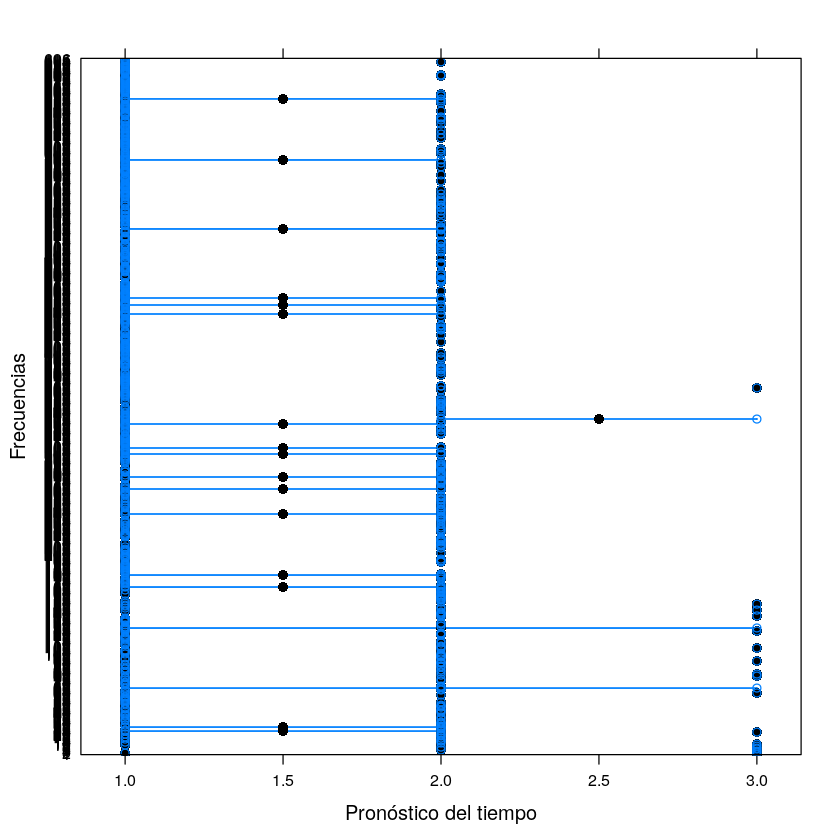

In [34]:
library(lattice)
bwplot(cnt ~ weathersit, data = data, 
       layout = c(1,1), 
       xlab = "Pronóstico del tiempo",
       ylab = "Frecuencias",
       panel = function(x,y,...){
         panel.bwplot(x,y,...)
         panel.stripplot(x,y,jitter.data = TRUE,...)
       },
       par.settings = list(box.rectangle = list(fill = c('red', 'yellow', 'green'))))

